<a href="https://colab.research.google.com/github/SVGS-EVA4/Phase2/blob/master/S2-MobileNets_and_ShuffleNets/Mobilenet_Preprocess_1.ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Unzip the dataset

In [ ]:
def unzip_files(filename = '/content/gdrive/My Drive/e4p2/s2/dataset.zip'):
  
  from zipfile import ZipFile 
  import os
  with ZipFile(filename, 'r') as zip_file: 
    
      # extracting all the files 
      print('Extracting all the files now...') 
      zip_file.extractall() 
      print('Done!')

In [11]:
unzip_files()

Extracting all the files now...
Done!


In [ ]:
ls '/content/content/dataset/Flying_Birds' | wc -l 

8198


In [ ]:
ls '/content/content/dataset/Large_QuadCopters' | wc -l 

4127


In [ ]:
ls '/content/content/dataset/Small_QuadCopters' | wc -l 

3475


In [ ]:
ls '/content/content/dataset/Winged_Drones' | wc -l 

5535


generate labels

In [ ]:

fnum = [5535,3475,4127,8198]
flist = ['Winged_Drones', 'Small_QuadCopters', 'Large_QuadCopters', 'Flying_Birds' ]
for i in range(4):
  for j in range(1,fnum[i]+1):
    # b = f"{flist[i]}/{flist[i]}_{j}.jpg {flist[i]}\n"    
    # g = open('/content/gdrive/My Drive/e4p2/labels.txt','a')
    # g.write(b)
    
    c = f"{flist[i]}/{flist[i]}_{j}.jpg {i}\n"
    h = open('/content/gdrive/My Drive/e4p2/labels_num.txt','a')
    h.write(c)

# b = f"{flist[i]}/{flist[i]}_{j+1}.jpg {flist[i]}"
# g = open('/content/gdrive/My Drive/e4p2/labels.txt','a')
# g.write(b)

c = f"{flist[i]}/{flist[i]}_{j}.jpg {i}\n"
h = open('/content/gdrive/My Drive/e4p2/labels_num.txt','a')
h.write(c)

37

In [ ]:
from PIL import Image
import numpy as np

In [ ]:
import os

In [ ]:
os.mkdir('/content/Dataset')
os.mkdir('/content/Dataset/Winged_Drones')
os.mkdir('/content/Dataset/Small_QuadCopters')
os.mkdir('/content/Dataset/Large_QuadCopters')
os.mkdir('/content/Dataset/Flying_Birds')

# Padding the images

In [17]:
from tqdm.notebook import tqdm
from PIL import Image
import numpy as np
lfile = open('/content/gdrive/My Drive/e4p2/s2/labels.txt','r').readlines()

for line in tqdm(lfile):

  img_path =line.split(' ')
    
  img = Image.open(f'/content/dataset/{img_path[0]}').convert('RGB')
  h,w = img.size[0],img.size[1]
  max_len = max(h,w)
  if h == w:
    img.save(f'/content/Dataset/{img_path[0]}')
    
  elif h>w:
    diff = int(abs(h-w)/2)
    black = np.zeros((max_len,max_len))
    black_img = Image.fromarray(black,mode='RGB')

    black_img.paste(img,(0,diff))
    black_img.save(f'/content/Dataset/{img_path[0]}')
  elif w>h:
    diff = int(abs(h-w)/2)
    black = np.zeros((max_len,max_len))
    black_img = Image.fromarray(black,mode='RGB')

    black_img.paste(img,(diff,0))

    black_img.save(f'/content/Dataset/{img_path[0]}')

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


In [ ]:
ls '/content/Dataset/Flying_Birds' | wc -l 

8198


In [ ]:
ls '/content/Dataset/Small_QuadCopters' | wc -l 

3475


In [ ]:
ls '/content/Dataset/Large_QuadCopters' | wc -l 

4127


In [ ]:
ls '/content/Dataset/Winged_Drones' | wc -l 

5535


zip the files

In [ ]:
#Export Zip file
from zipfile import ZipFile 
import zipfile
  
def get_all_file_paths(directory): 
  
    # initializing empty file paths list 
    file_paths = [] 
  
    # crawling through directory and subdirectories 
    for root, directories, files in os.walk(directory): 
        for filename in files: 
            # join the two strings in order to form the full filepath. 
            filepath = os.path.join(root, filename) 
            file_paths.append(filepath) 
  
    # returning all file paths 
    return file_paths         
  
def main(): 
    # path to folder which needs to be zipped 
    directory = 'Dataset'
  
    # calling function to get all file paths in the directory 
    file_paths = get_all_file_paths(directory) 
    # writing files to a zipfile 
    with ZipFile('/content/gdrive/My Drive/e4p2/dataset_padded.zip','a', compression = zipfile.ZIP_DEFLATED) as zip: 
        # writing each file one by one 
        for file in file_paths: 
            zip.write(file) 
  
    print('All files zipped successfully!')         
  
  

main()

All files zipped successfully!


In [19]:
unzip_files(filename='/content/gdrive/My Drive/e4p2/s2/dataset_padded.zip')

Extracting all the files now...
Done!


(1000, 600)


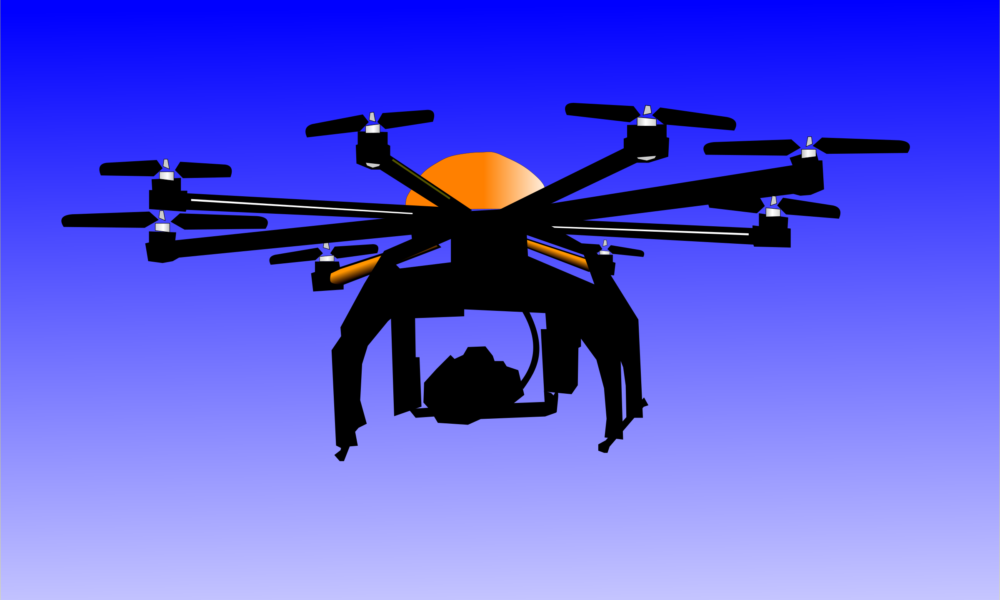

In [20]:
from PIL import Image
img1 = Image.open('/content/dataset/Winged_Drones/Winged_Drones_229.jpg')
print(img1.size)
img1

(1000, 1000)


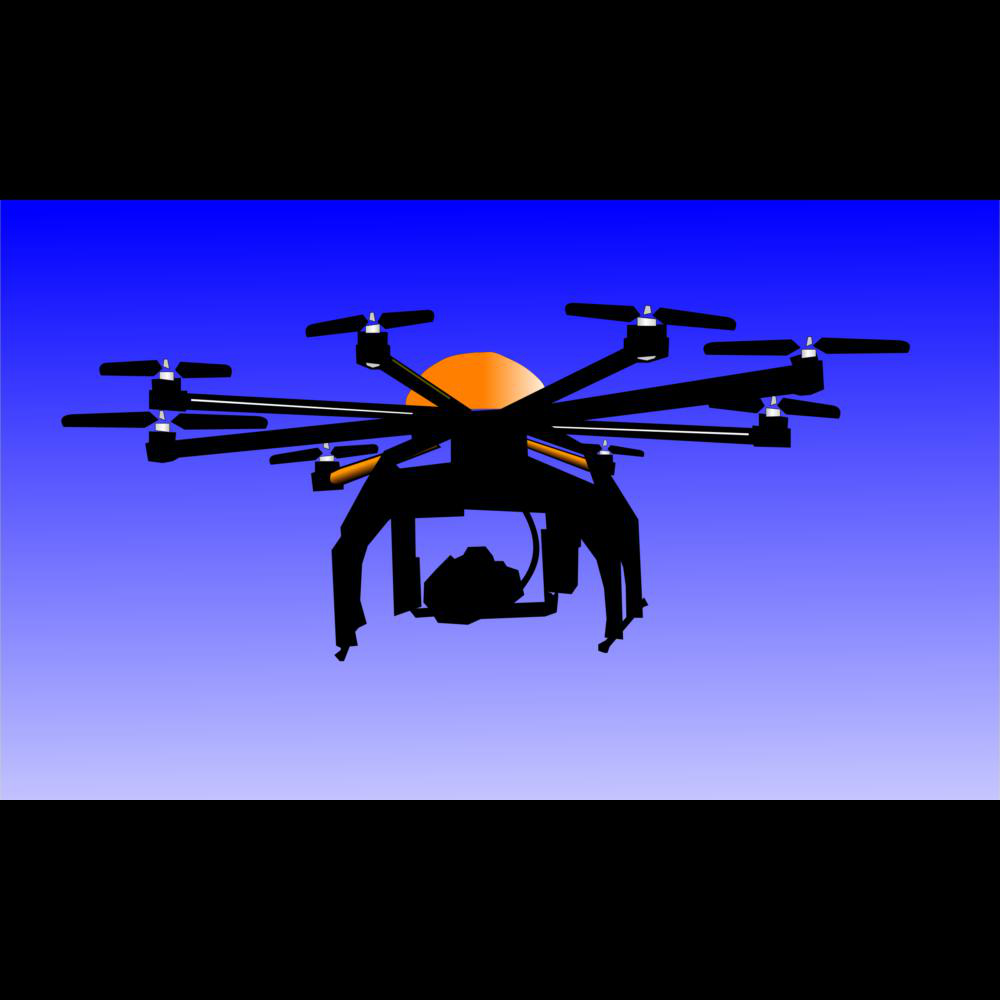

In [21]:
img1_padded = Image.open('/content/Dataset/Winged_Drones/Winged_Drones_229.jpg')
print(img1_padded.size)
img1_padded

(600, 900)


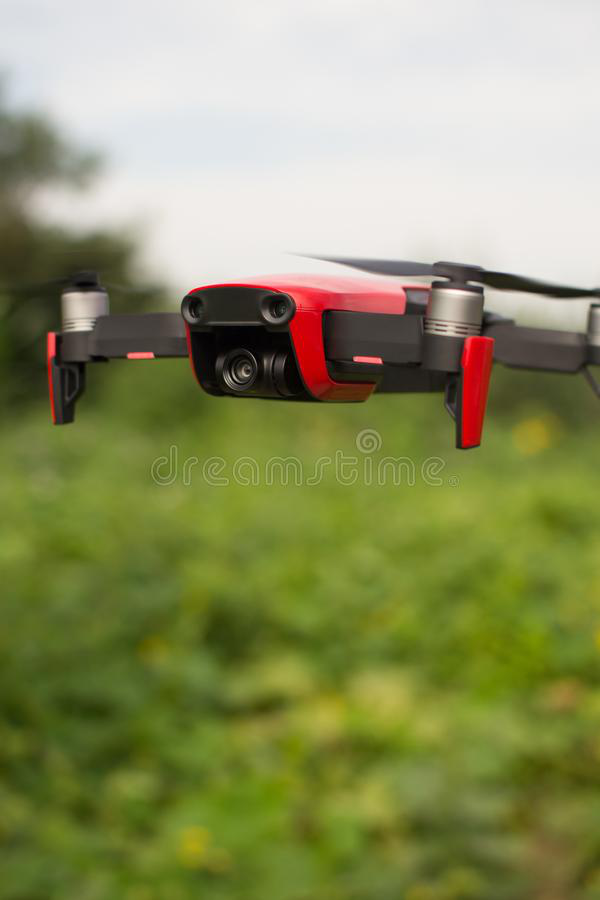

In [22]:
img2= Image.open('/content/dataset/Small_QuadCopters/Small_QuadCopters_1210.jpg')
print(img2.size)
img2

(900, 900)


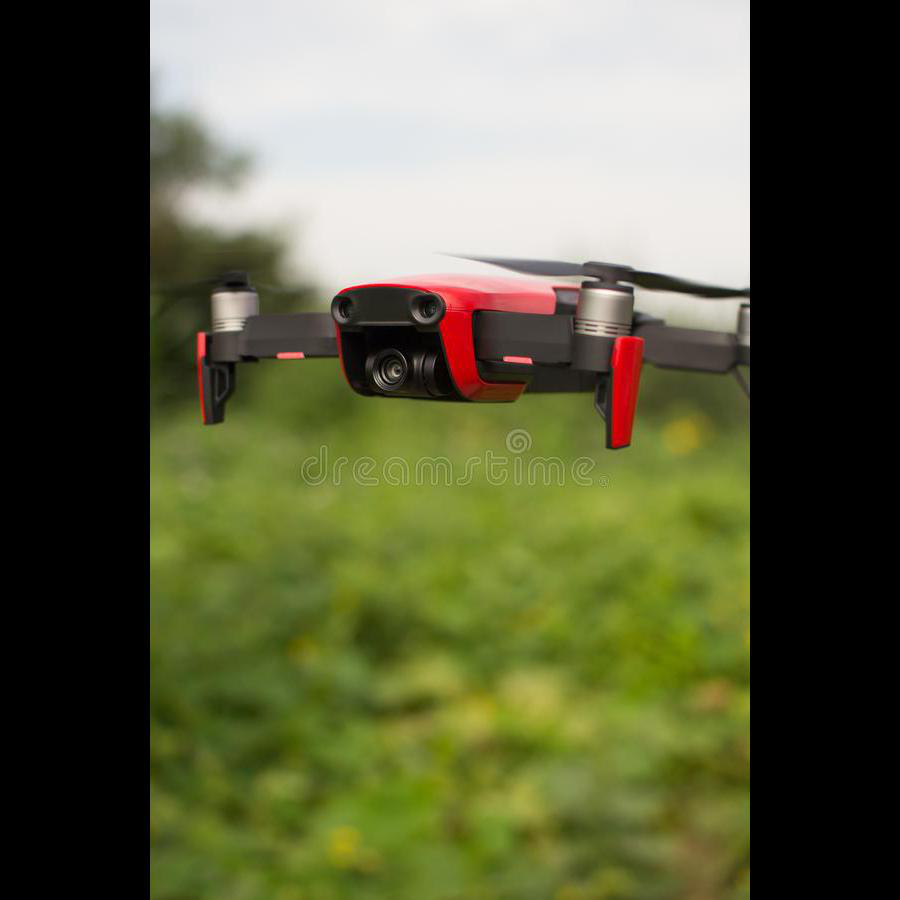

In [24]:
img2_padded= Image.open('/content/Dataset/Small_QuadCopters/Small_QuadCopters_1210.jpg')
print(img2_padded.size)
img2_padded